# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

In [3]:
n1 = xw.Book('себестоимостьА_в1.xlsx')
sht1 = n1.sheets["Рецептура"]
recipe1 = sht1.range('рцп_пшеничный_хлеб').value
recipe1 

[['№',
  'Наименование продукции',
  'Вес, кг.',
  'Цена оптовая, руб.',
  'Цена розничная, руб.',
  'Физический расход ресурсов на единицу продукции',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'Доля'],
 [None,
  None,
  None,
  None,
  None,
  'Вода',
  'Пшеничная мука',
  'Дрожжи',
  'Сахар',
  'Соль',
  'Куркума молотая',
  'Топленное масло',
  'Кунжутные семена',
  'Масло оливковое',
  None,
  None,
  None,
  None],
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [1.0,
  'Хлеб Венгерский',
  0.4,
  35.0,
  50.0,
  0.2,
  0.4,
  0.02,
  0.02,
  0.01,
  0.005,
  0.1,
  None,
  None,
  None,
  None,
  None,
  0.3],
 [2.0,
  'Хлеб "Барбари"',
  0.25,
  28.0,
  40.0,
  0.07,
  0.25,
  0.01,
  0.06,
  0.015,
  None,
  0.06,
  0.05,
  None,
  None,
  None,
  None,
  0.2],
 [3.0,
  'Багет парижский',
  0.25,
  35.0,
  50.0,
  0.12,
  0.22,
  0.00

2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

In [4]:
recipe1.to_excel('себестоимостьА_в1.xlsx', sheet_name='Рецептура')

AttributeError: 'list' object has no attribute 'to_excel'

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

4. Выполнить 3 с помощью "протягиваемых" формул.

## Лабораторная работа 7.1

In [2]:
!pip install xlsxwriter
!pip install xlwings

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 5.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.4 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import xlsxwriter
import xlwings as xw

Matplotlib is building the font cache; this may take a moment.


1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [5]:
recipes=pd.read_csv('recipes_sample.csv')
print(recipes)
reviews=pd.read_csv('reviews_sample.csv')
recipes=recipes.drop(['contributor_id','n_steps'],axis=1)

                                               name      id  minutes  \
0             george s at the cove  black bean soup   44123       90   
1                healthy for them  yogurt popsicles   67664       10   
2                      i can t believe it s spinach   38798       30   
3                              italian  gut busters   35173       45   
4          love is in the air  beef fondue   sauces   84797       25   
...                                             ...     ...      ...   
29995  zurie s holey rustic olive and cheddar bread  267661       80   
29996          zwetschgenkuchen  bavarian plum cake  386977      240   
29997   zwiebelkuchen   southwest german onion cake  103312       75   
29998                                   zydeco soup  486161       60   
29999        cookies by design   cookies on a stick  298512       29   

       contributor_id   submitted  n_steps  \
0               35193  2002-10-25      NaN   
1               91970  2003-07-26      NaN 

2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [11]:
recipes5=recipes.sample(frac=0.05)
reviews5=reviews.sample(frac=0.05) #5% от таблицы

writer = pd.ExcelWriter('recipes.xlsx', engine='xlsxwriter')

reviews5.to_excel(writer, sheet_name='Рецепты')
recipes5.to_excel(writer, sheet_name='Отзывы')
writer.save()

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [15]:
seconds_assign = recipes['minutes']*60

book = xw.Book('recipes.xlsx')
sheet = book.sheets['Рецепты'] 
sheet.range('H1').value = seconds_assign

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [16]:
sheet.range('J1').value = 'seconds_formula'
sheet.range('J2:J1501').formula = f'=(D2:D1501)*60'

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [17]:
sheet.range(f'$A1:$J1').api.HorizontalAlignment = -4108
sheet.range(f'$A1:$J1').api.Font.Bold = True

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [18]:
for i in sheet.range('D2:D1501'):
    if i.value < 5:
        i.color = (0,255,0)
    elif i.value>10:
        i.color=(255,0,0)
    else:
        i.color=(255,255,0)

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [ ]:
n_reviews=pd.DataFrame([f'=COUNTIFS(Отзывы!C:C;Рецепты!A{x+2})' for x in range(1500)],columns=['n_reviews'])
book.sheets['Рецепты'].range('I1:I1501').options(index=False).value=n_reviews

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [ ]:
def validate():
    wb = xw.Book('recipes.xlsx')
    sht = wb.sheets['Отзывы']
    for i in range(2, 6336):
        if sht.range(f'F{i}').value < 0 or sht.range(f'F{i}').value > 5 or sht.range(f'D{i}').value not in wb.sheets['Рецепты'].range('B2:B1501').value:
            sht.range(f'A{i}:Z{i}').color = (255, 0, 0)
validate()

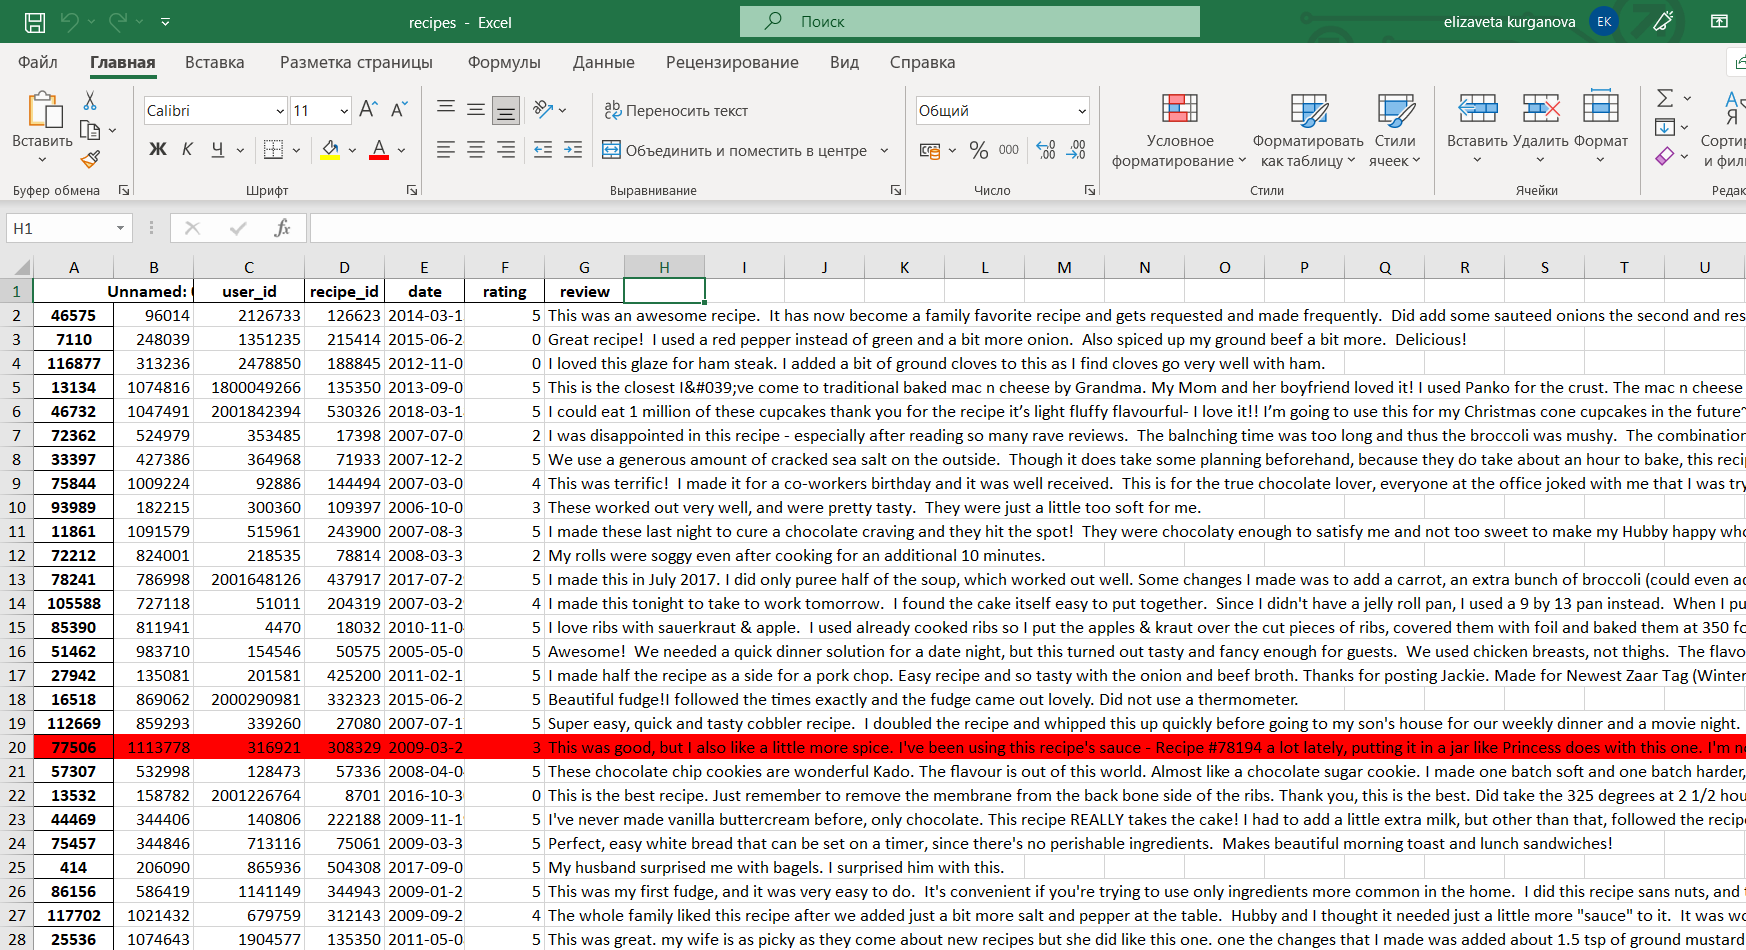

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [ ]:
import csv
with open('recipes_model.csv','r') as f:
    rec_mod = csv.reader(f, delimiter = '\t')
    rec_data = list(rec_mod)
model = xw.Book()
model_sheet = model.sheets.add('Модель')
model_sheet.range('A2').value = rec_data
model.save('recipes_model1.xlsx')
model.close()

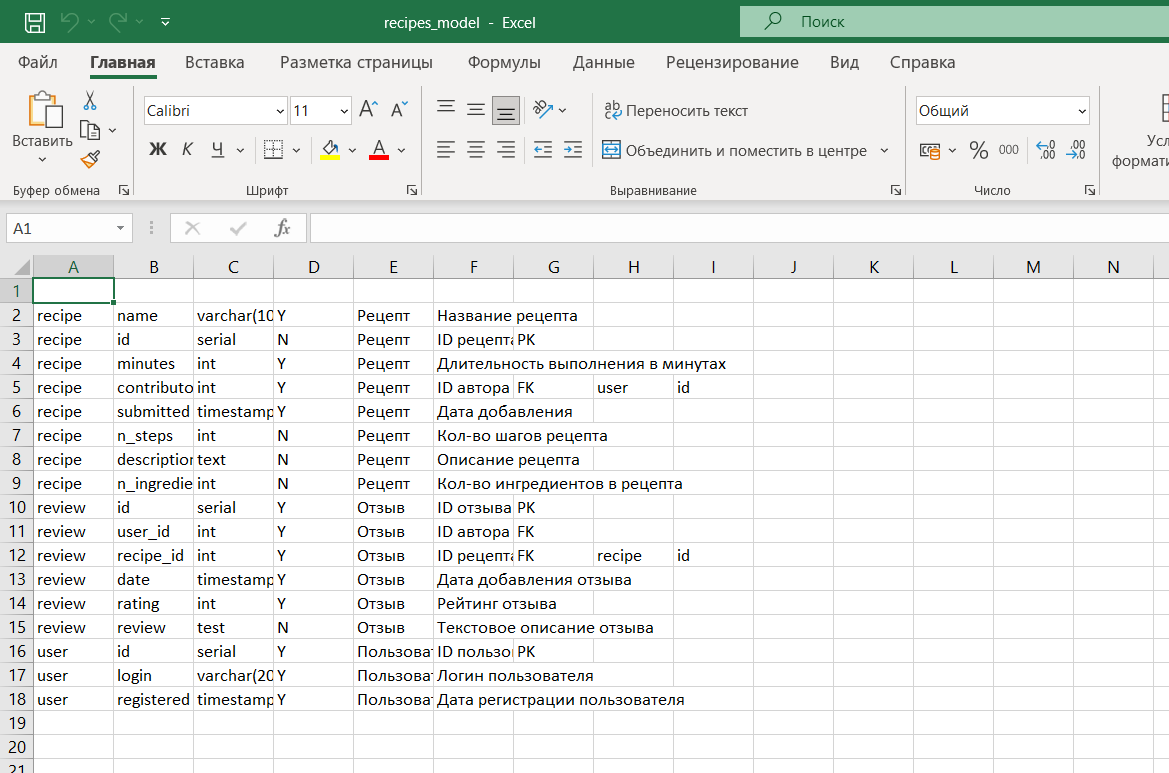

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [ ]:
w2=xw.Book('recipes_model.xlsx')
sheet=w2.sheets['Модель']

n_rows=sheet.range('A2').current_region.last_cell.row-1

for x in range (2, n_rows+2):
    b=sheet.range(f'B{x}').value
    c=sheet.range(f'C{x}').value.upper()
    h=sheet.range(f'H{x}').value
    i=sheet.range(f'I{x}').value
    
    j=f'{b} {c}'
    key=sheet.range(f'F{x}').value
    if key=='PK':
        j+=' PRIMARY KEY'
    elif key=='FK':
        j+=f' REFERENCES {h}({i})'
        
    req=sheet.range(f'D{x}').value
    if req=='Y' and key!='PK':
        j+=' NOT NULL'
    
    sheet.range(f'J{x}').value=j
    
w2.save('recipes_model.xlsx')
w2.close()

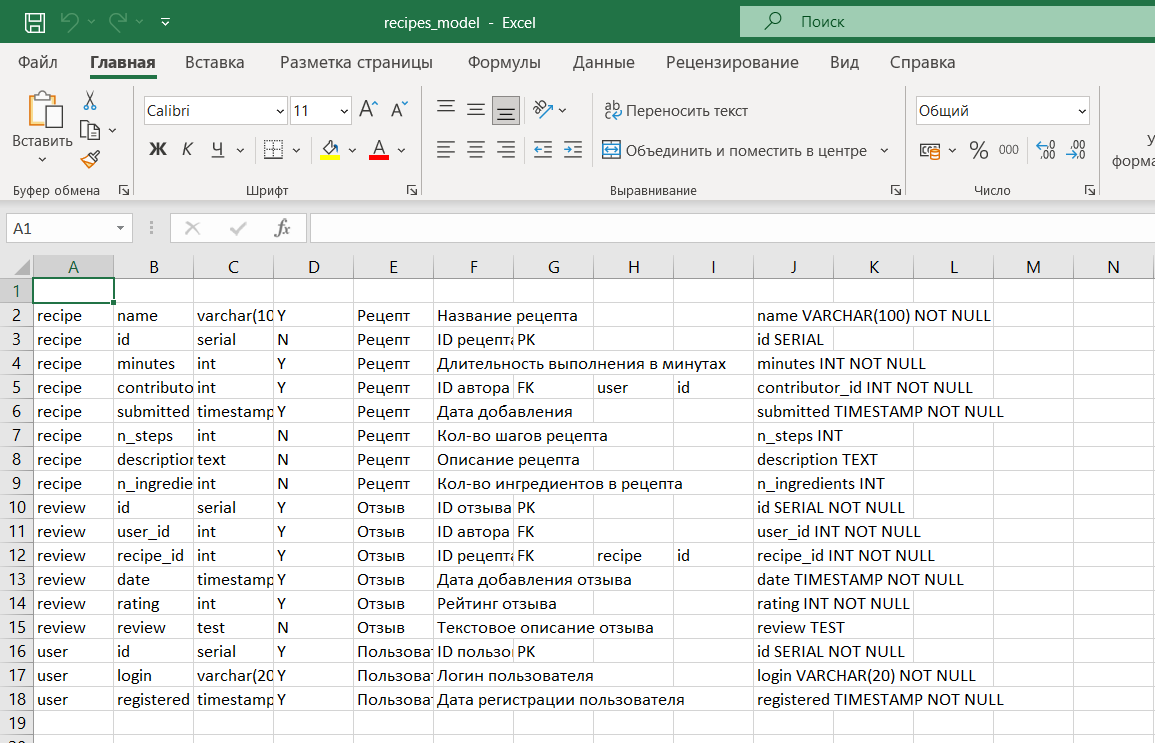

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [ ]:
w2=xw.Book('recipes_model.xlsx')
sheet=w2.sheets['Модель']
sheet.range('A2:J2').color='#00ccff'
sheet.autofit('c')
sheet.range('A2:J2').api.Font.Bold=True
sheet.show_autofilter=True

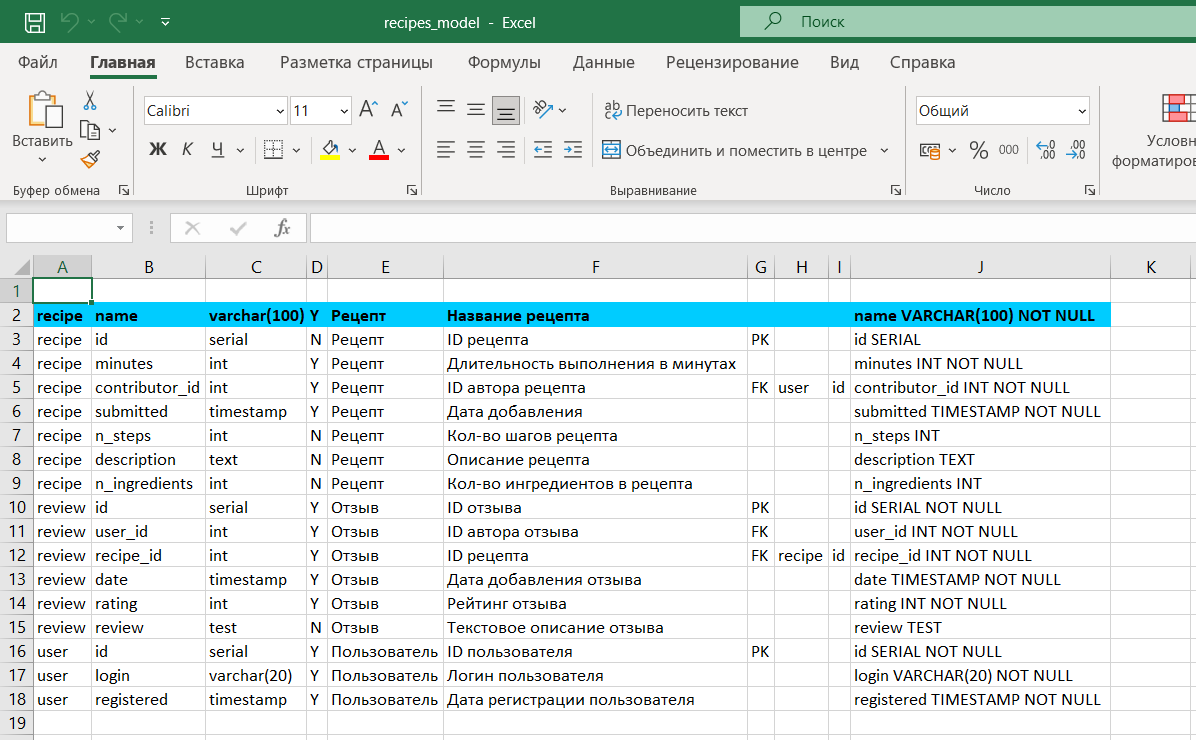

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

In [ ]:
st=w2.sheets['Статистика']
model=sheet.range('A2:B18').value
table=pd.DataFrame(model[1:], columns=['Сущность', 'Атрибут']).groupby('Сущность').count()
st.range('A1').value=table
d=table.plot.bar()

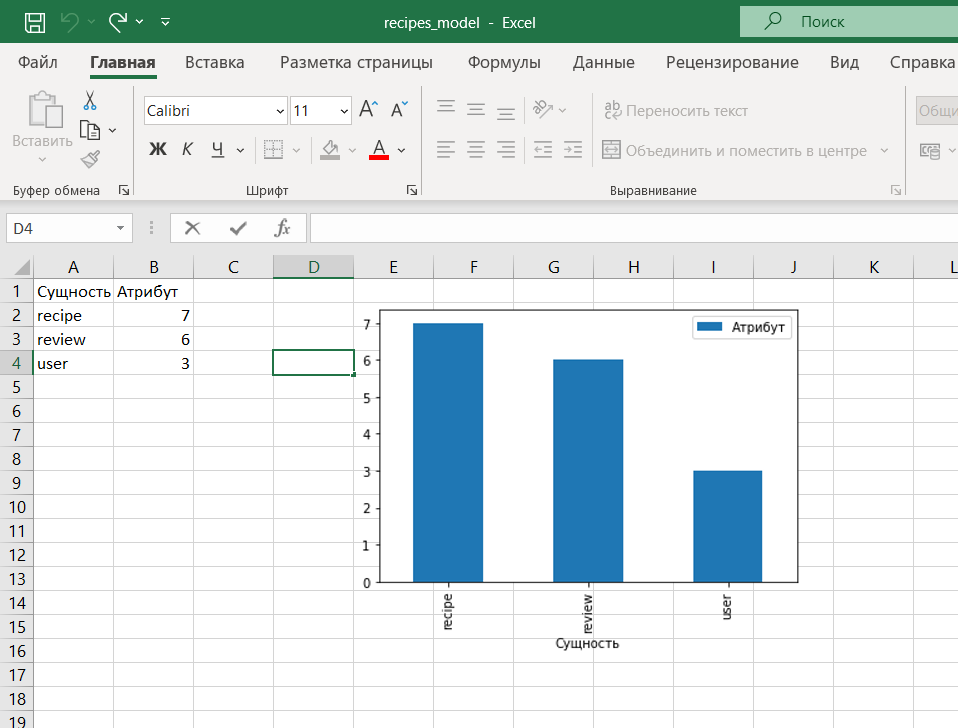